# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 1

**Правила:**

* Выполненную работу нужно отправить телеграм-боту, адрес которого будет указан на странице курса до конца недели. Обращаем ваше внимание, что в боте необходимо заранее зарегистрироваться и дождаться подтверждения.
* Дедлайн **17 февраля в 18:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.

-----

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

%matplotlib inline

Для выполнения задания вы можете установить свою палитру цветов при отрисовке графиков с помощью кода ниже. Если введете несуществующее имя, то вам напечатается список возможных палитр. Также вы можете устанавливать свои цвета конкретным объектам на графиках, обычно это делается с помощью аргумента `color`.

In [2]:
sns.set_palette('winter_r')

### Задача 1

Для выполнения задания выберите любой профиль, в течении 1-2 недель его можно поменять. Студенты кафедры инновационная педагогика выполняют задание по профилю педагогика.

**Профиль биология**

Скачайте <a href="https://www.kaggle.com/ruslankl/mice-protein-expression
">датасет</a> с данными об экспрессии белков у белых мышей. Данный датасет состоит из таблицы значений уровней экспрессии 77 различных белков в мозге у мышей. Каждая строка соответствует одной особи, каждый столбец соответствует одному белку. На столбцы Genotype, Treatment и подобные пока не обращаем внимания. 

Для исследования рекомендуется выбрать столбцы 'ITSN1_N', 'DYRK1A_N', 'pBRAF_N', 'pCREB_N', но можно взять и другие.

**Профиль физика**

Скачайте <a href="https://www.kaggle.com/fedesoriano/cern-electron-collision-data
">датасет</a> с данными о столкновении электронов на Большом Адронном Коллайдере. 

Данный датасет  содержит информацию о событиях столкновения двух электронов. Он состоит из таблицы различных параметров столкновений. Каждая строка соответствует одному столкновению, каждый столбец соответствует одному параметру. Например, в столбцах E1, E2 записаны значения энергии сталкивающихся электронов, в столбцах px1, py1, pz1, px2, py2, pz2 — значения моментов импульса, в столбцах Q1, Q2 $-$ заряды электронов.

Для исследования рекомендуется выбрать столбцы 'E2', 'px2', 'eta2', 'phi2'. Все эти столбцы — некоторые параметры второго электрона. Можно взять и другие столбцы.

**Профиль педагогика**

Скачайте <a href="https://www.kaggle.com/spscientist/students-performance-in-exams
">датасет</a> с данными о результатах учащихся на экзаменах.

Данный датасет состоит из таблицы баллов учащихся на экзаменах по математике, чтению и письму, а также дополнительной информации о студентах. Каждая строка соответствует одному учащемуся, каждый столбец соответствует одному признаку. В столбцах math score, reading score и writing score записаны баллы за экзамены.

Для исследования возьмите столбцы 'math score', 'reading score', 'writing score'.

----

Чтобы скачать данные, зарегистрируйтесь на сайте, после нажмите download на странице датасета и распакуйте скачанный архив. Вы получите файл формата `csv`.

Если вы работаете в Google Colab, можно загрузить полученный файл в разделе "Файлы" (значок папки) на левой панели.

In [3]:
# эта функция читает данные, в кавычках укажите путь к файлу на вашем компьютере или в Colab
df = pd.read_csv("./dielectron.csv")
#df = pd.read_csv("./dielectron.csv")
#df = pd.read_csv("./StudentsPerformance.csv")

Посмотрим на первые строки этой таблицы.

In [4]:
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


Выберите несколько (3-6) столбцов для анализа значений в них.

In [5]:
# укажите столбцы данных 
# Пример: columns = ['math score', ...]
columns = ['E1', 'E2', 'M', 'eta1', 'eta2']

df_chosen_columns = df[columns]

#Одномерный массив значений одного признака (например, 'math score') можно получить так:
#df_chosen_columns['math score']

#### Гистограммы

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией `matplotlib.pyplot.hist`.

*Примечание.* В анализе данных обычно используется слово "признак" для обозначения исследуемого свойства объекта. Например, для биологического датасета признаком является белок.


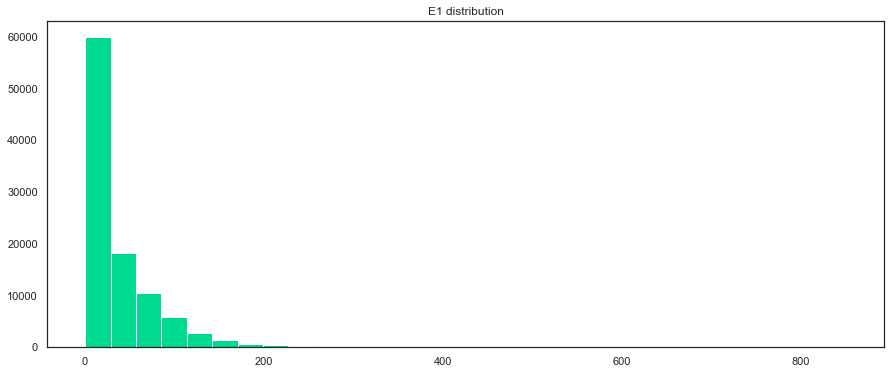

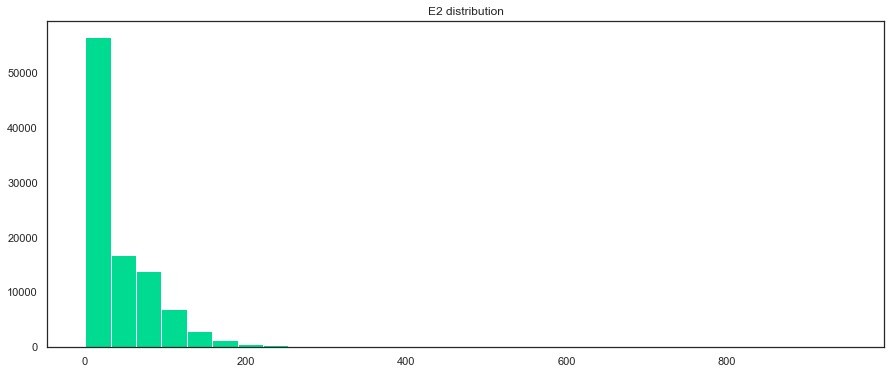

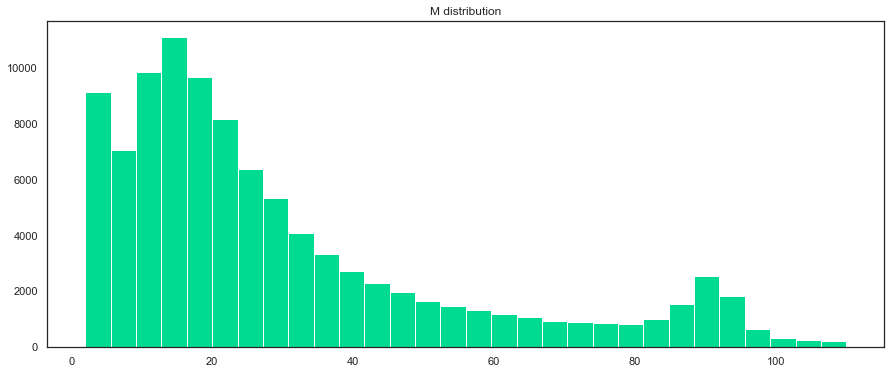

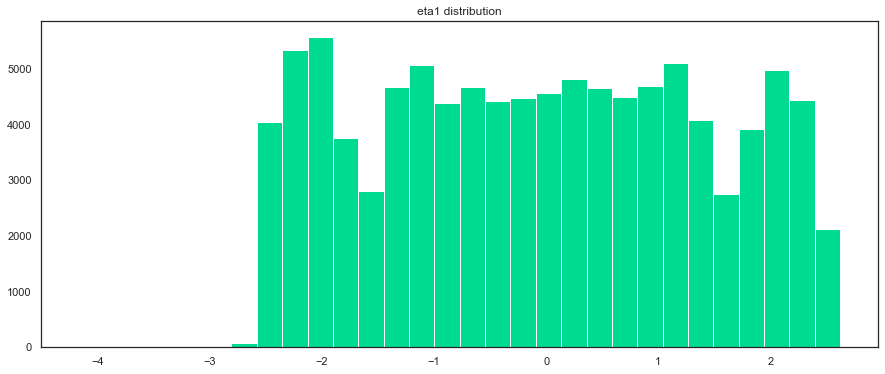

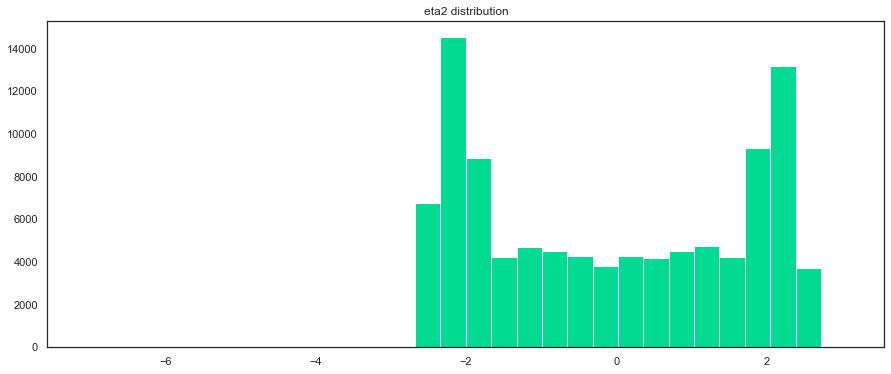

In [6]:
for i, column in enumerate(columns):
    plt.figure(figsize=(15, 6))
    
    plt.hist(df_chosen_columns[columns[i]], bins=30)
    plt.title(column + ' distribution');

Выбросы — значения, которые сильно отличаются от большинства значений выборки. Они могут возникать из-за ошибки измерения, из-за необычной природы входных данных, но также могут быть и частью распределения.

По гистограммам предположите, в каких из исследуемых признаков могут быть выбросы?

**Ответ:** Вероятно, выбросы есть в eta1 и eta2, поскольку значительная часть графика представляет собой пустое пространство. Точки есть на всей построенной области, кроме того, не похоже, чтобы eta1 и eta2 как-то монотонно убывало. Что же касается энергий E1 и E2, там наблюдаетсяы такая ж картина, но гистограммы убывают монотонно. Вероятно, там все точки - часть распределения, но мы их просто не видим, поскольку там значения слишком маленькие.

Выбросы могут сильно портить внешний вид графика.

Продемонстрируем это на примере. Сгенерируем выборку размера 1000 из стандартного нормального распределения и построим по ней гистограмму. В библиотеке `scipy` это можно сделать с помощью метода `rvs`

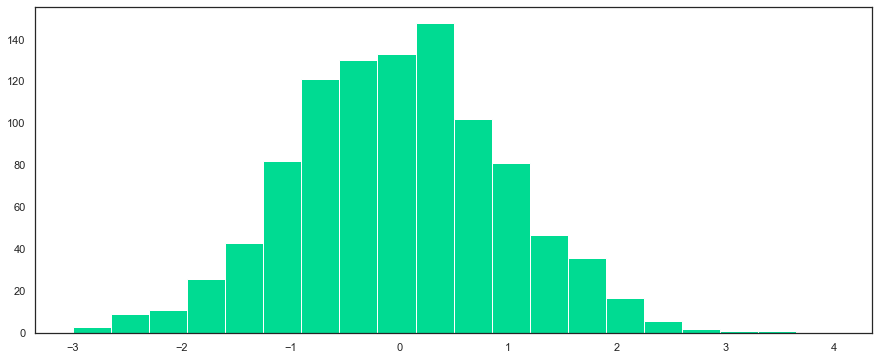

In [7]:
sample = sps.norm.rvs(size=1000)

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Как видим, большая часть значений находятся в промежутке от -3 до 3.

Теперь добавим выброс — очень большое значение, которое могло появиться, например, в результате ошибок измерения. Допустим, что выброс — первое измерение.

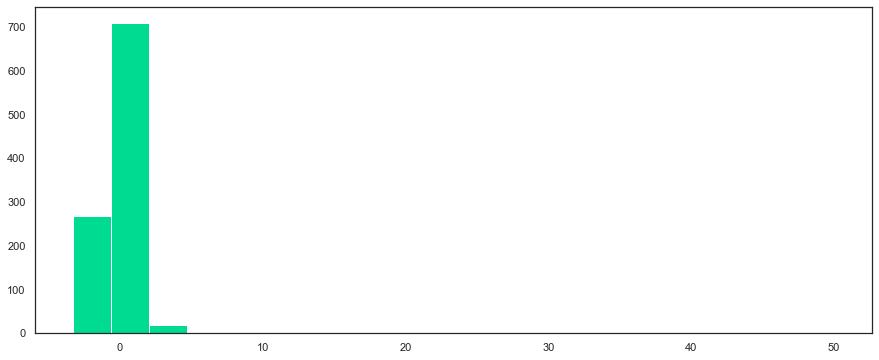

In [8]:
outlier = 50
sample[0] = outlier

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20);

По такому графику уже нельзя сделать предположение о распределении выборки.
Также обратите внимание, что большая часть графика пустая, что говорит о неинформативности данного графика.

Эту проблему с графиками можно решить с помощью параметра `range`, который определяет, в каких границах строится гистограмма.

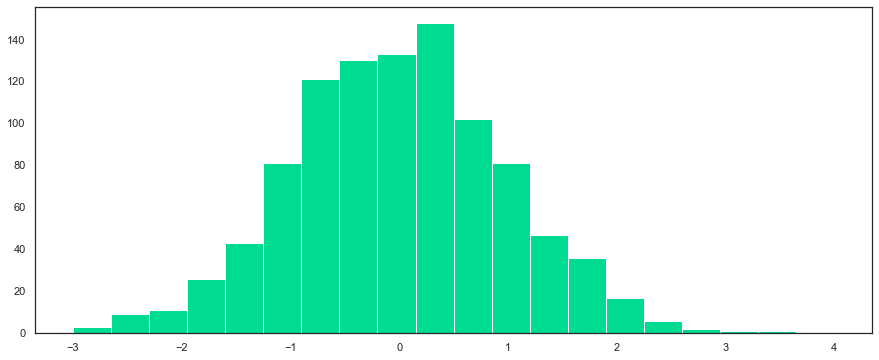

In [9]:
plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Проделайте то же самое с теми столбцам, в которых, как вы считаете, есть выбросы.

В словаре `ranges_without_outliers` укажите, в каких пределах, по вашему мнению, стоит нарисовать гистограмму распределения для каждого признака.

Пример заполнения словаря на ячейке ниже. 

Здесь мы считаем, что для признака `column1` большая часть значений находится в промежутке от -1 до 5, а все значения за пределами этого промежутка — выбросы.
Мы хотим нарисовать информативный график для гистограммы значений признака `column1`, поэтому гистограмму будем строить только на основе значений из промежутка (-1, 5)

Аналогично для признака `column2`

In [10]:
ranges_without_outliers_example = {
    'column1' : (-1, 5),
    'column2' : (0, 3)
}

Аналогично определите интервалы для исследуемых признаков

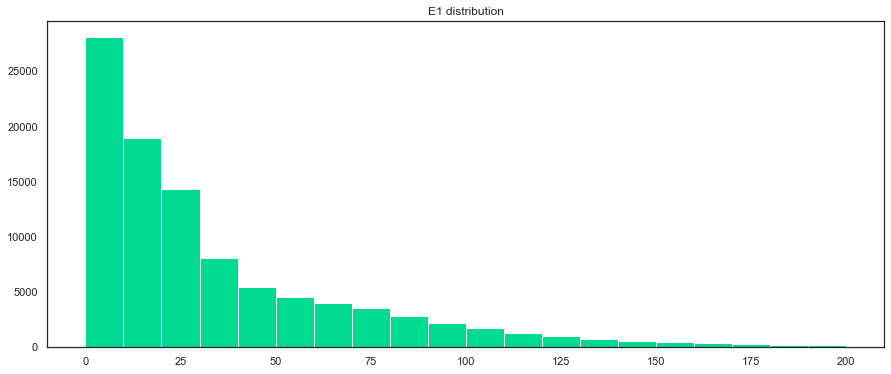

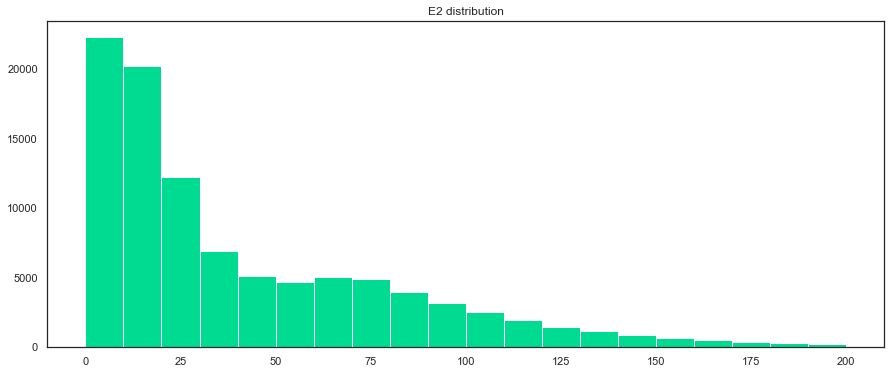

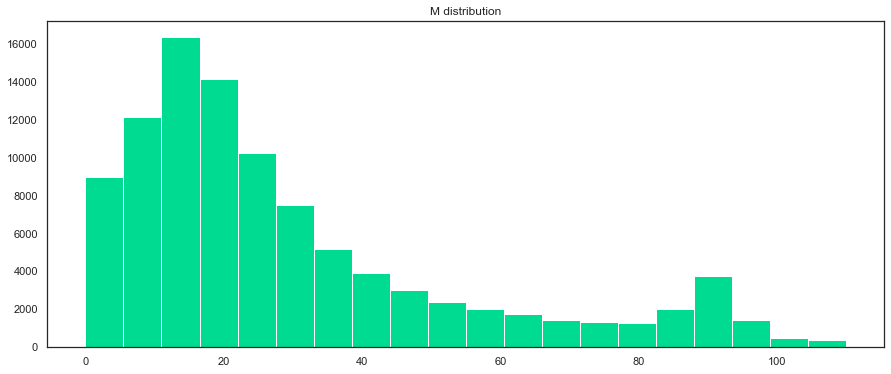

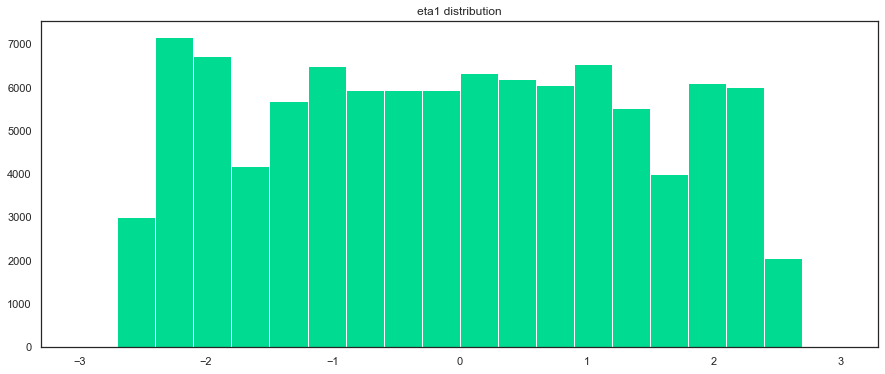

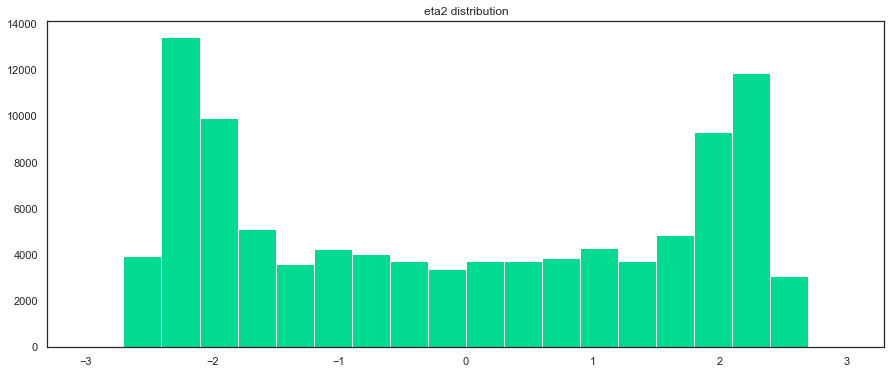

In [11]:
ranges_without_outliers = {
    'E1' : (0, 200),
    'E2' : (0, 200),
    'M' : (0, 110),
    'eta1' : (-3, 3),
    'eta2' : (-3, 3)
}


for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(df_chosen_columns[column], range=column_range, bins=20)
    plt.title(column + ' distribution')

**Сделайте выводы** 

Изменилась ли форма распределений, стали ли графики информативнее?

**Ответ:** Да, стали. Кроме того, где-то в районе 500-600 почти обрываются диаграммы для E1, E2, и все, что расположено далее, вероятно, можно считать выбросами. Где-то после 300 исчезает "монотонность" диаграмм, что связано, по-видимому, с недостаточным количеством попаданий частиц в данные ячейки (нужно больше повторений эксперимента). 

Помимо этого, исчезли выбросы  для eta1 и eta2, но их было не так уж и много.

#### Ядерные оценки плотности

Иногда гистограммы недостаточно, чтобы понять, какое у распределение у элементов выборки. В таких случаях можно использовать ядерные оценки плотности. 

В библиотеке `seaborn` они представлены функциями `distplot` (в версиях до `0.11.1`), `kdeplot` (начиная с версии `0.11.1`)

In [12]:
sns.__version__

'0.11.1'

Пример для нормального распределения с выбросом.

<AxesSubplot:ylabel='Count'>

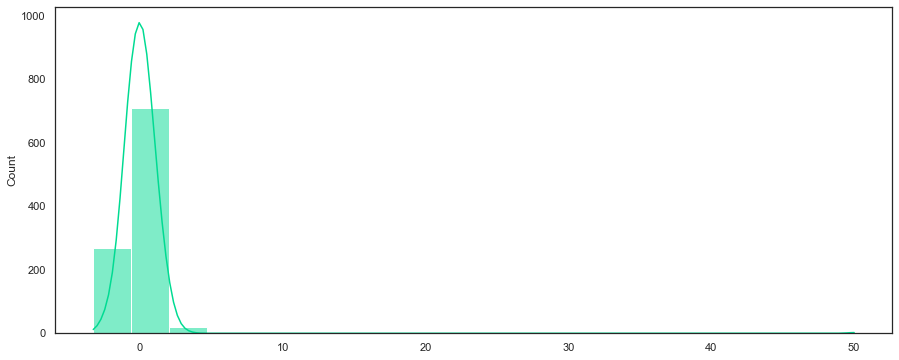

In [13]:
plt.figure(figsize=(15, 6))
sns.histplot(sample, kde=True, bins=20)

Видно, что, даже несмотря на "хвост", плотность основной части данных довольно похожа на плотность нормального распределения. Теперь нарисуем этот же график для выборки без выброса.

Для наглядности на этом же графике нарисуем плотность стандартного нормального распределения. В библиотеке `scipy` плотность распределения называется `pdf`.

D:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


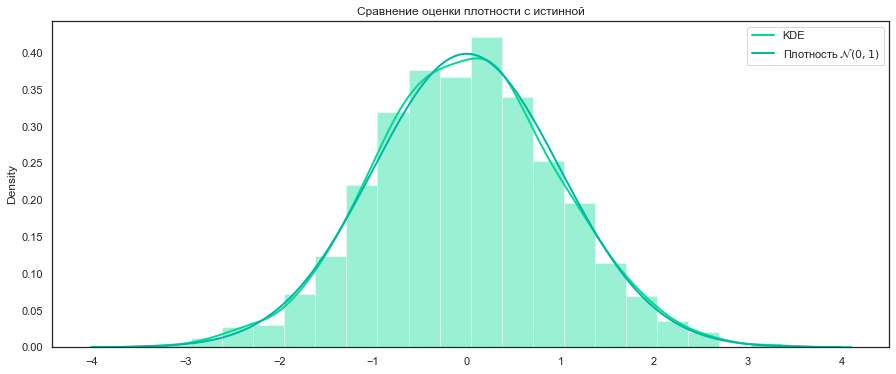

In [14]:
# уберем выброс
sample_wo_ourliers = sample[1:]

# сетка от -4 до 4 из 1000 значений
grid = np.linspace(-4, 4, 1000)
# считаем значения функции в выборке
norm_pdf_values = sps.norm.pdf(grid)

# отрисовка графика
plt.figure(figsize=(15, 6))
sns.distplot(sample_wo_ourliers, bins=20, kde_kws={"label": "KDE", "linewidth": 2})
plt.plot(grid, norm_pdf_values, label='Плотность $\\mathcal{N}(0,1)$', lw=2)
plt.title('Сравнение оценки плотности с истинной')
plt.legend();

Однако ядерные оценки плотности тоже не универсальны.
Рассмотрим пример экспоненциального распределения.

Сгенерируйте выборку размера 100 из экспоненциального распределения $\textit{Exp(1)}$. Для этого воспользуйтесь функцией `sps.expon.rvs`.

In [15]:
sample = sps.expon.rvs(size = 100)

Посчитайте значения плотности этого распределения на промежутке от 0 до 6.

In [16]:
grid = np.linspace(0, 6, 100)
exp_den = np.exp(-grid)

Нарисуйте гистограмму и ядерную оценку плотности для выборки из сгененированного экспоненциального распределения.

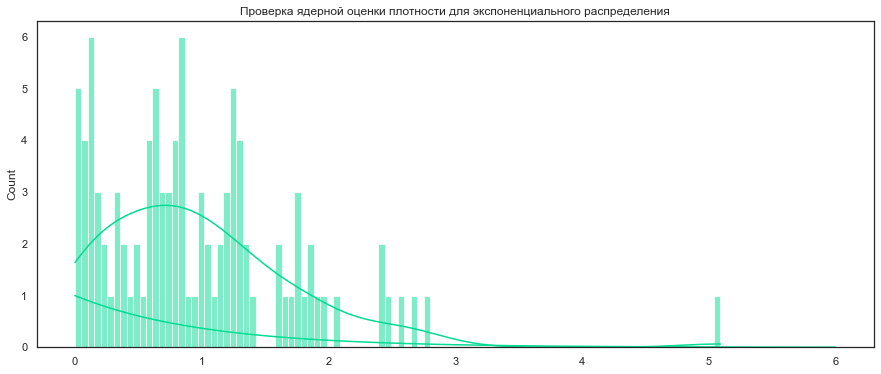

In [17]:
# построим то, что просят в условии
plt.figure(figsize = (15, 6))
sns.histplot(sample, kde = True, bins = 100)
plt.plot(grid, exp_den)
plt.title('Проверка ядерной оценки плотности для экспоненциального распределения')
plt.show()

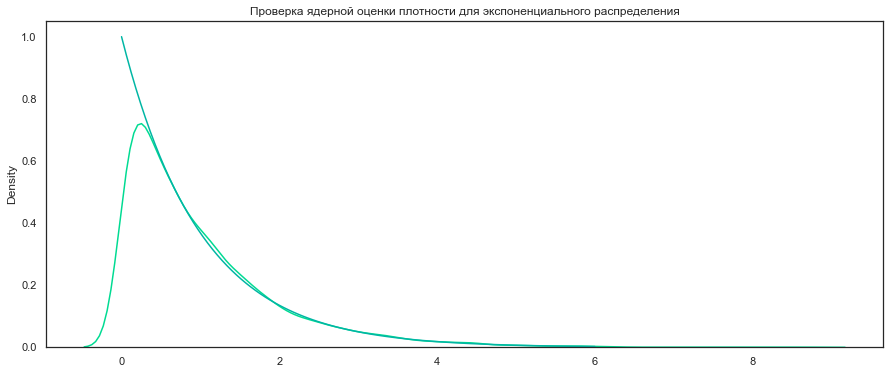

In [18]:
# построим то же, но для большего количества точек. Чтобы не париться с масштабированием,
# сразу будем строить ядерную оценку плотности. Мне кажется, так нагляднее видно, в чем проблем.

sample = sps.expon.rvs(size = 10000)

plt.figure(figsize = (15, 6))
sns.kdeplot(sample)
plt.plot(grid, exp_den)
plt.title('Проверка ядерной оценки плотности для экспоненциального распределения')
plt.show()

Как вы думаете, почему ядерная оценка плотности так плохо приближает реальную плотность распределения?

**Ответ:** Скорее всего, сложность в том, что расределение нулевое слева от нуля. Строго говоря, плотность распределения разрывна (0 слева от 0). И мы не можем так просто аппроксимировать этот разрыв.

Иными словами, в точки около 0 нет вклада "слева", а только вклад справа. Это не дает возможностья ядерной оценке дойти до реальной. Хотя если вспомнить, что слева 0, то в целом получается достаточно похоже.

Нарисуйте гистограммы и ядерные оценки плотности для исследуемых признаков

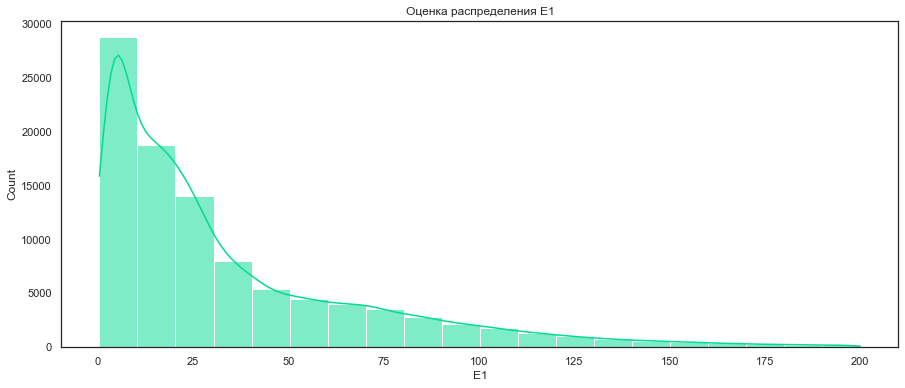

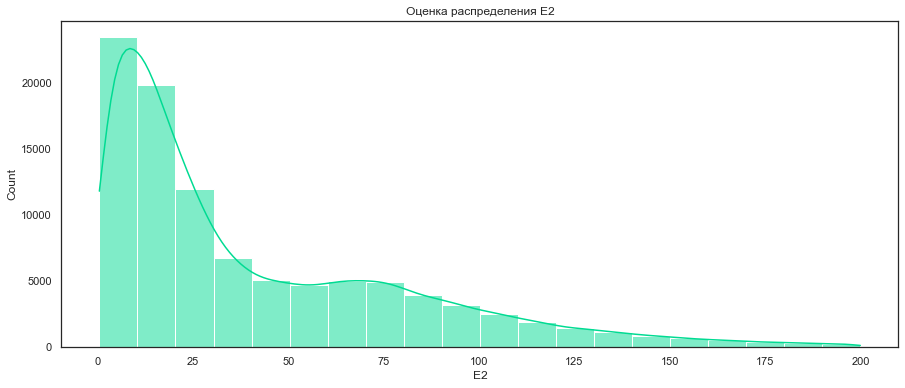

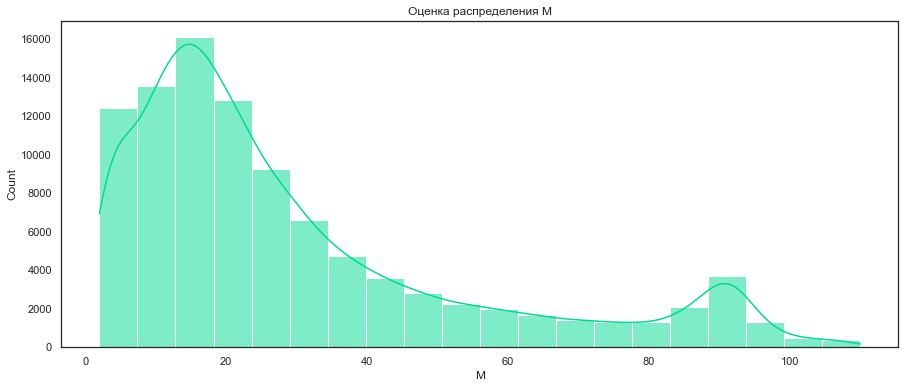

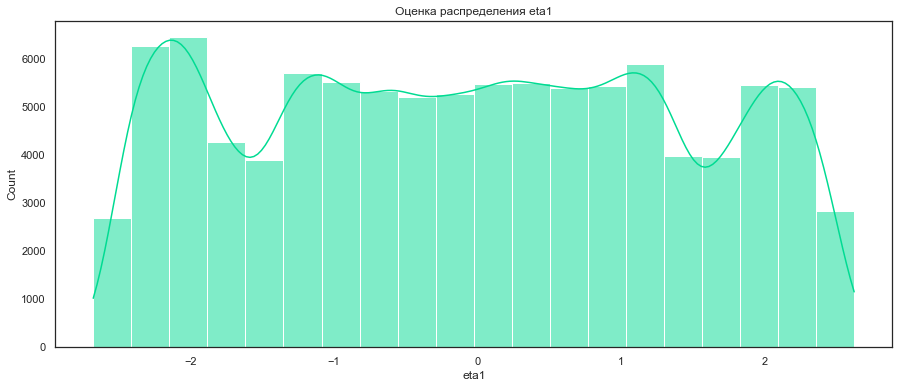

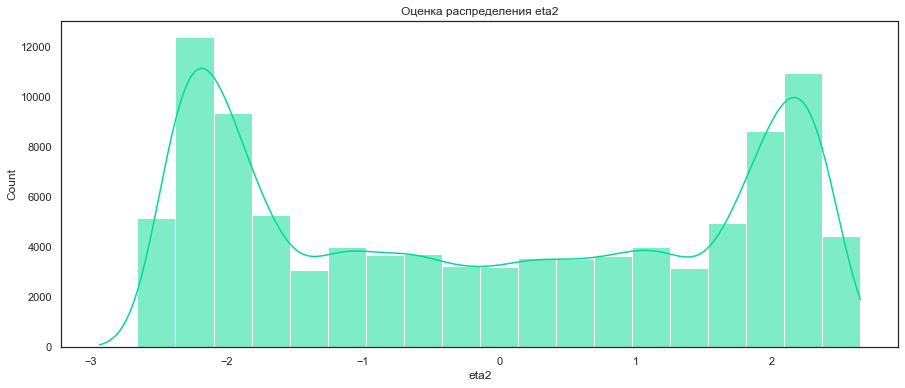

In [19]:
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    
    # для каждого признака оставьте значения внутри ранее заданного промежутка column_range
    #plt.hist(df_chosen_columns[column], range=column_range, bins=20)
    #print( column_range[])
    col = df_chosen_columns[column]
    cut_col = col[(col < int(column_range[1])) & (col > int(column_range[0]))]
    sns.histplot(cut_col, bins=20, kde=True)
    
    #sns.distplot(<...>, bins=20);
    plt.title('Оценка распределения ' + column)

In [20]:
x = np.arange(10)

x[(x > 2) & (x < 5)]
#list(ranges_without_outliers.items())[0][1][1]

array([3, 4])

**Сделайте выводы.** Какой из двух видов графиков более нагляден для данных выборки? Какими свойствами должно обладать распределение признака, чтобы ядерная оценка плотности, полученная по выборке, была похожа на настоящую плотность? 

**Вывод:** Более нагляден, конечно, график с отсутствием выбросов, а также способствует лучшей визуализации и ядерная оценка плотности. Чтобы ядерная оценка плотности, полученная по выборке, была похожа на настоящую плотность, необходимо, чтобы функция распределения была непрерывной, в смысле, чтобы не было резких скачков.

Здесь мы "избавились" от выбросов для того, чтобы понять, как распределена бОльшая часть выборки.

Но нужно понимать, что избавляться от выбросов при анализе данных стоит не всегда.
Прежде, чем удалять выбросы из выборки, хорошо бы понимать:
1. **Какая цель исследования**. Например, если мы хотим узнать, как хорошо "средний" студент МФТИ решает задачи по теории вероятностей, результаты лучших студентов на потоке не сильно проясняют ситуацию и затрудняют анализ. Такие результаты нужно выкинуть. Если же надо отобрать студентов на стажировку для аналитиков данных, хорошие результаты не только не нужно отсеивать, но и нужно анализировать дополнительно.
2. **Почему** отличающееся значение могло появиться в выборке. Это случайность / ошибка в измерениях / следствие какого-то еще фактора? Возможно, удаление отличающегося элемента лишит нас важных знаний о природе исследуемых данных.



**Приведите примеры исследований**, в которых нужно/не нужно удалять выбросы в данных:

нужно удалять: изучение столкновений двух тел (много внешних случайных факторов), изучение средних погодных условий (по построению задачи, нам нужно усредненное значение)
не нужно удалять: поиски новой частицы на коллайдере, определение наиболее подходящего материала для какого-то изобретения (выброс - отлично подходит)
...

**Сделайте выводы по всей задаче:**

1) Для визуализации даных удобны гистограммы и ядерные оценки плотности распределения
2) Ядерные оценки плотности хорошо работают только с непрерывными распределениями с не очень большой производной
3) Выбросы часто бывает полезно отбрасывать, поскольку они сильно ухудшают наглядность графиков и гистограмм.

## Задача 2

В этой задаче нужно визуализировать *центральную предельную теорему*.



*a).* Пусть $\xi_1, ..., \xi_n$ — независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$, где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. 

In [21]:
size = 300  # размер выборки
samples_count = 500 # количество выборок

samples = np.empty((samples_count, size))

for i in range(samples_count):
    samples[i] = sps.expon.rvs(size = size)

По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. 

In [22]:
sums = np.empty((samples_count, size))
sums = samples.cumsum(1)
# по первой, а не нулевой оси суммируем, то есть внутри каждой выборки, как и нужно

Для этого среднего посчитайте величину $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}$.

*Подсказка: можно воспользоваться возможностями библиотеки `numpy`.*

In [23]:
averages = np.average(sums, 0)
dispersions = np.average(sums * sums, 0) - averages * averages
# теперь уже усредняем по выборкам
#print(averages)
#print(dispersions)
z_s = (sums - averages) / np.sqrt(dispersions)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

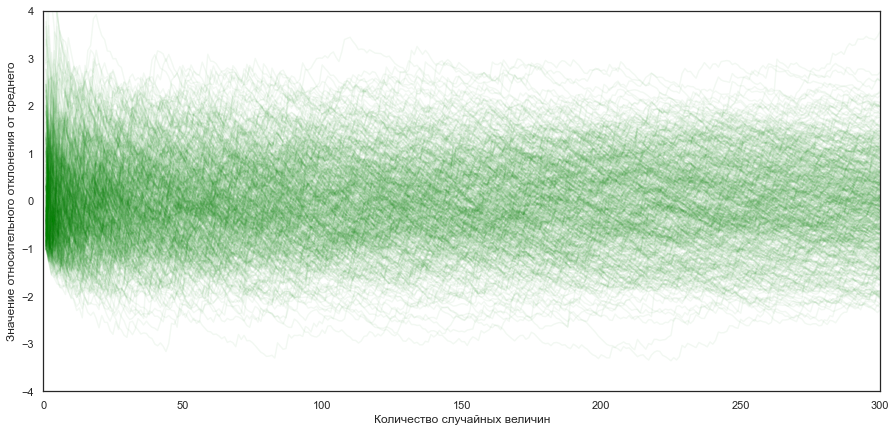

In [24]:
plt.figure(figsize=(15, 7))

# для каждой выборки рисуем отдельную кривую
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, z_s[i], color='green', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение относительного отклонения от среднего')

# ограничения графика по осям
plt.xlim((0, size))
plt.ylim((-4, 4));


Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду (подписи на графиках, см. семинар и туториалы).

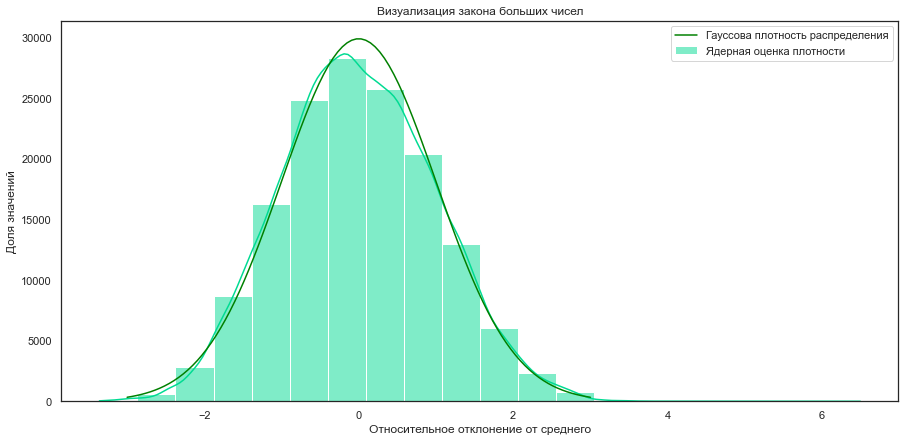

In [38]:
plt.figure(figsize=(15, 7))
plt.title('Визуализация закона больших чисел')

grid = np.linspace(-3, 3, 100)

sns.histplot(z_s.flatten(), bins = 20, kde = True, label = 'Ядерная оценка плотности')
plt.plot(grid, 75000 * 1 / np.sqrt (2 * np.pi) * np.exp (- grid * grid / 2), color='green', label='Гауссова плотность распределения')

plt.xlabel('Относительное отклонение от среднего')
plt.ylabel('Доля значений')

plt.legend()

plt.show()






*b).* Выполните те же действия для распределения $Pois(1)$.


Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

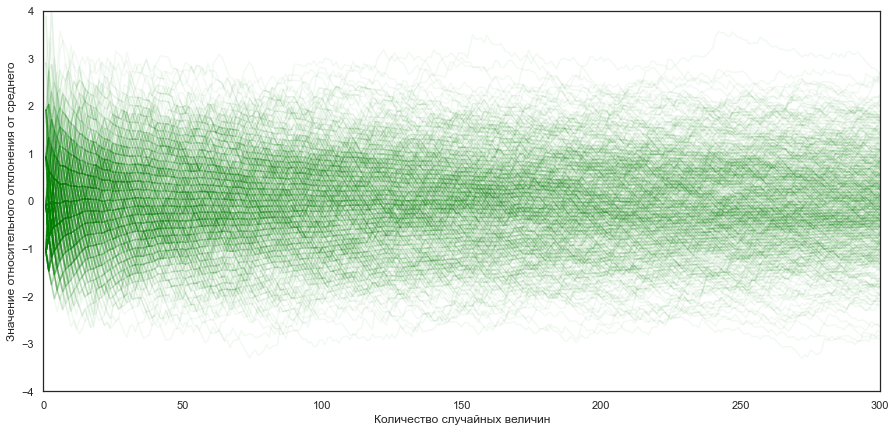

In [41]:
size = 300  # размер выборки
samples_count = 500 # количество выборок

samples = np.empty((samples_count, size))

for i in range(samples_count):
    samples[i] = np.random.poisson(1, size = size)
    
sums = np.empty((samples_count, size))
sums = samples.cumsum(1)
# по первой, а не нулевой оси суммируем, то есть внутри каждой выборки, как и нужно

averages = np.average(sums, 0)
dispersions = np.average(sums * sums, 0) - averages * averages
# теперь уже усредняем по выборкам

z_s = (sums - averages) / np.sqrt(dispersions)

plt.figure(figsize=(15, 7))

# для каждой выборки рисуем отдельную кривую
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, z_s[i], color='green', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение относительного отклонения от среднего')

# ограничения графика по осям
plt.xlim((0, size))
plt.ylim((-4, 4));

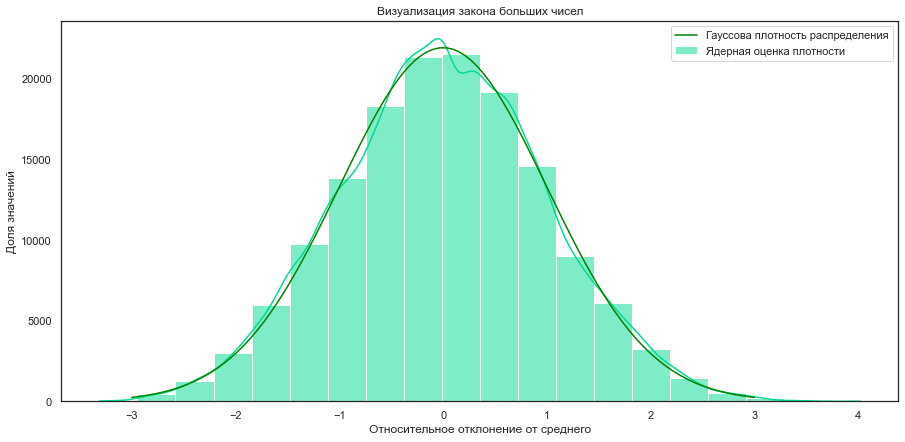

In [45]:
plt.figure(figsize=(15, 7))
plt.title('Визуализация закона больших чисел')

grid = np.linspace(-3, 3, 100)

sns.histplot(z_s.flatten(), bins = 20, kde = True, label = 'Ядерная оценка плотности')
plt.plot(grid, 55000 * 1 / np.sqrt (2 * np.pi) * np.exp (- grid * grid / 2), color='green', label='Гауссова плотность распределения')

plt.xlabel('Относительное отклонение от среднего')
plt.ylabel('Доля значений')

plt.legend()

plt.show()